In [461]:
# Steps of homework
#1. Importing libaries
#2. Downloading dataset



In [462]:
# For playing with data
import pandas as pd
import numpy as np

# For calculating mututal information score
from sklearn.metrics import mutual_info_score

# for data division between training, validation and testing
from sklearn.model_selection import train_test_split


# Preprocessing , trainig and for measuring logisitic regression model 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Still need to document the purpose ()
from IPython.display import display

# for visulization
import matplotlib.pyplot as plt
import seaborn as sns


In [463]:
# Link to our dataset
data_link = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"


In [464]:
# installing the data
#This command downloads a file from the URL stored in $data using wget and saves it locally as data-week-3.csv.
#The ! allows running the shell command inside a Jupyter or Colab notebook.
!wget $data_link -O data-homework-3.csv 

--2025-10-15 21:59:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘data-homework-3.csv’

data-homework-3.csv 100%[===================>]  78.98K  --.-KB/s    in 0.004s  

2025-10-15 21:59:23 (19.4 MB/s) - ‘data-homework-3.csv’ saved [80876/80876]



In [465]:
# using data frame to read the csv file
df = pd.read_csv("data-homework-3.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [466]:
# Make visulization of columns easy
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [467]:
# Checking types of different columns, some columns are object (String), int64 and float64
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [468]:

# Checking the numeric and non numeric columns  (Applying a filter based on data types)

exclude_cols = ['converted'] # is is target column
numerical_columns = [
    col for col in df.dtypes[df.dtypes != 'object'].index if col not in exclude_cols
]
categorial_columns = list(df.dtypes [df.dtypes == 'object'].index)

print(numerical_columns)
print(categorial_columns)

['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
['lead_source', 'industry', 'employment_status', 'location']


In [469]:
# Checking which columns contain null
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [470]:
# Dealing with absense of values in data (NAN,)
df[numerical_columns] = df[numerical_columns].fillna(0.0) # Numerical with Zero
df[categorial_columns] = df[categorial_columns].fillna('NA') # Categorical with 'NA'

In [471]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [472]:
# Checking which columns contain null
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [473]:
# Number of unique values in each categorical column
df[categorial_columns].nunique()

lead_source          6
industry             8
employment_status    5
location             8
dtype: int64

In [474]:
# Finding presence of a particular value in a column
column_name = 'industry'
df[column_name].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   

                          interaction_count  lead_score  
number_of_courses_viewed          -0.023565   -0.004879  
annual_income                      0.027036    0.015610  
interaction_count                  1.000000    0.009888  
lead_score                         0.009888    1.000000  


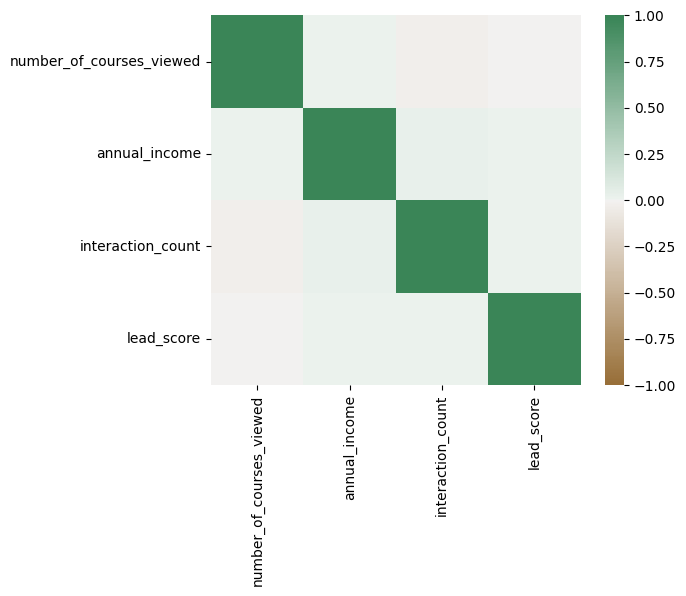

In [475]:
# Creating a correlation matrix
#A matrix is an array of numbers arranged in rows and columns.
#A correlation matrix is simply a table showing the correlation coefficients between variables.
# The values ranges are between -1 and 1
# Columns needs to be numerical
# How to interpert different values
# If you see all the options are between numerical columns


# 

correlation_matrix =  df[numerical_columns].corr()

print(correlation_matrix)



# Visulization using seaborn library
axis_corr = sns.heatmap(
correlation_matrix,      # data you want to visualize
vmin=-1, vmax=1, center=0,   #minimum and maximum values for the color scale
cmap=sns.diverging_palette(50, 500, n=500), # creates a gradient that diverges around a center value
square=True # Makes each cell in the heatmap a perfect square,
)

plt.show()









# What we will do after creating correlation matrix



In [476]:
# Compute correlation matrix
corr_matrix = df[numerical_columns].corr()

# Replace diagonal (self-correlation = 1) with NaN so it’s ignored
np.fill_diagonal(corr_matrix.values, np.nan)

# Find the max correlation
max_corr = corr_matrix.max().max()
print("Maximum correlation:", max_corr)

# Find which pair of columns has this correlation
max_pair = corr_matrix.stack().idxmax()
print("Columns with max correlation:", max_pair)

Maximum correlation: 0.02703647240481443
Columns with max correlation: ('annual_income', 'interaction_count')


In [477]:


# Loop through each column and print unique values
for col in categorial_columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(unique_vals)
    print('-' * 40)

Column: lead_source
['paid_ads' 'social_media' 'events' 'referral' 'organic_search' 'NA']
----------------------------------------
Column: industry
['NA' 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']
----------------------------------------
Column: employment_status
['unemployed' 'employed' 'NA' 'self_employed' 'student']
----------------------------------------
Column: location
['south_america' 'australia' 'europe' 'africa' 'middle_east' 'NA'
 'north_america' 'asia']
----------------------------------------


In [478]:
#doing some analysis on churn values
# Calculate mean churn for each gender automatically
churn_by_gender = df.groupby('lead_source')['converted'].mean()

print(churn_by_gender)

lead_source
NA                0.671875
events            0.596000
organic_search    0.617021
paid_ads          0.446970
referral          0.807692
social_media      0.604317
Name: converted, dtype: float64


In [479]:
global_converted = df.converted.mean()
global_converted

np.float64(0.6190150478796169)

In [480]:
for col in categorial_columns:
    converted_by_column = df.groupby(col)['converted'].mean()
    print(converted_by_column)
    print("--------------------------------------------")

lead_source
NA                0.671875
events            0.596000
organic_search    0.617021
paid_ads          0.446970
referral          0.807692
social_media      0.604317
Name: converted, dtype: float64
--------------------------------------------
industry
NA               0.559701
education        0.748663
finance          0.595000
healthcare       0.604278
manufacturing    0.666667
other            0.611111
retail           0.586207
technology       0.569832
Name: converted, dtype: float64
--------------------------------------------
employment_status
NA               0.560000
employed         0.689024
self_employed    0.653409
student          0.652299
unemployed       0.497006
Name: converted, dtype: float64
--------------------------------------------
location
NA               0.698413
africa           0.601064
asia             0.620513
australia        0.605405
europe           0.652778
middle_east      0.631313
north_america    0.595556
south_america    0.598958
Name: convert

In [481]:
for c in categorial_columns:
    print(c)
    df_group = df.groupby(c).converted.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_converted
    df_group['risk'] = df_group['mean'] / global_converted
    display(df_group)
    print()
    print()

lead_source


,mean,count,diff,risk
lead_source,,,,
NA,0.671875,128,0.052860,1.085394
events,0.596000,250,-0.023015,0.962820
organic_search,0.617021,282,-0.001994,0.996779
paid_ads,0.446970,264,-0.172045,0.722066
referral,0.807692,260,0.188677,1.304802
social_media,0.604317,278,-0.014699,0.976255




industry


,mean,count,diff,risk
industry,,,,
NA,0.559701,134,-0.059314,0.904181
education,0.748663,187,0.129648,1.209442
finance,0.595000,200,-0.024015,0.961204
healthcare,0.604278,187,-0.014737,0.976193
manufacturing,0.666667,174,0.047652,1.076980
other,0.611111,198,-0.007904,0.987231
retail,0.586207,203,-0.032808,0.946999
technology,0.569832,179,-0.049183,0.920547




employment_status


,mean,count,diff,risk
employment_status,,,,
NA,0.560000,100,-0.059015,0.904663
employed,0.689024,328,0.070009,1.113098
self_employed,0.653409,352,0.034394,1.055563
student,0.652299,348,0.033284,1.053769
unemployed,0.497006,334,-0.122009,0.802898




location


,mean,count,diff,risk
location,,,,
NA,0.698413,63,0.079398,1.128264
africa,0.601064,188,-0.017951,0.971000
asia,0.620513,195,0.001498,1.002420
australia,0.605405,185,-0.013610,0.978014
europe,0.652778,216,0.033763,1.054543
middle_east,0.631313,198,0.012298,1.019867
north_america,0.595556,225,-0.023459,0.962102
south_america,0.598958,192,-0.020057,0.967599


In [482]:
# Mutual information between Categorial columns and target variable

# Mutual Information is a measure of how much "information" you can get of one variable by observing another variable

# We should also write down formula as well, about how to calculate it

# Can we calculate the range of Mutual information


def mutual_info_converted_score(series):
    return mutual_info_score(series, df.converted) # calling function of library





In [483]:
# Calling the function
mutual_information = df[categorial_columns].apply(mutual_info_converted_score)

# Sorting the results
mutual_information.sort_values(ascending=False)


lead_source          0.026574
employment_status    0.011070
industry             0.007267
location             0.001427
dtype: float64

In [484]:
# Breaking data into different parts


# Taking full dataset and converting to 80% and 20%, random seed are used for reproducbility
seed = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)



In [485]:
# dividing between train and validation

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [486]:
# Verifiying the number of records
len(df_full_train), len(df_train), len(df_val), len(df_test)

(1169, 876, 293, 293)

In [487]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [488]:
# correcting the index after splitting the data
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [489]:
# dividing the data into x and y features and target
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [490]:
def mutual_info_converted_score_train(series):
    return mutual_info_score(series, y_train) # calling function of library

In [491]:
# Calling the function on training dataset
mutual_information_train = df_train[categorial_columns].apply(mutual_info_converted_score_train)


# Round the values (e.g., 2 decimal places)
mutual_information_train = mutual_information_train.round(2)

# Sorting the results
mutual_information_train.sort_values(ascending=False)


lead_source          0.04
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorial_columns + numerical_columns].to_dict(orient='records')


X_train = dv.fit_transform(train_dict)


val_dict = df_val[categorial_columns + numerical_columns].to_dict(orient='records')

X_val = dv.transform(val_dict)


In [493]:
# Step 9: Train logistic regression model
# - Using solver='liblinear' for small datasets
# - C=1.0 (regularization), max_iter=1000, random_state=42 for reproducibility
# Train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)  # Correct usage
accuracy = accuracy_score(y_val, y_val_pred)
accuracy_rounded = round(accuracy, 2)
print("Validation Accuracy:", accuracy_rounded)

Validation Accuracy: 0.7


In [494]:
df_train_final

array([[0.0000e+00, 5.8472e+04, 5.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 7.1738e+04, 6.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 8.1973e+04, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [3.0000e+00, 8.9042e+04, 4.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.0000e+00, 5.0259e+04, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(876, 31))

In [ ]:

features_to_test = ['industry', 'employment_status', 'lead_score']
feature_names = dv.get_feature_names_out()

print(feature_names)

differences = {}

for feature in features_to_test:
    if feature == 'lead_score':
         # Numerical feature: find the single column index
        cols_to_remove = [i for i, f in enumerate(feature_names) if f == feature]
    else:
        # Categorical feature: find all one-hot column indices for this feature
        cols_to_remove = [i for i, f in enumerate(feature_names) if f.startswith(feature + '=')]
    
    X_train_mod = np.delete(X_train, cols_to_remove, axis=1)
    X_val_mod = np.delete(X_val, cols_to_remove, axis=1)
    
    model.fit(X_train_mod, y_train)
    y_val_pred_mod = model.predict(X_val_mod)
    accuracy_mod = accuracy_score(y_val, y_val_pred_mod)
    
    differences[feature] = accuracy - accuracy_mod
    print(f"Accuracy without {feature}: {round(accuracy_mod,3)}, difference: {round(differences[feature],3)}")

least_useful = min(differences, key=lambda x: abs(differences[x]))
print("Least useful feature:", least_useful)


['annual_income' 'employment_status=NA' 'employment_status=employed'
 'employment_status=self_employed' 'employment_status=student'
 'employment_status=unemployed' 'industry=NA' 'industry=education'
 'industry=finance' 'industry=healthcare' 'industry=manufacturing'
 'industry=other' 'industry=retail' 'industry=technology'
 'interaction_count' 'lead_score' 'lead_source=NA' 'lead_source=events'
 'lead_source=organic_search' 'lead_source=paid_ads'
 'lead_source=referral' 'lead_source=social_media' 'location=NA'
 'location=africa' 'location=asia' 'location=australia' 'location=europe'
 'location=middle_east' 'location=north_america' 'location=south_america'
 'number_of_courses_viewed']
Accuracy without industry: 0.7, difference: 0.0
Accuracy without employment_status: 0.696, difference: 0.003
Accuracy without lead_score: 0.706, difference: -0.007
Least useful feature: industry


In [496]:
C_values = [0.01, 0.1, 1, 10, 100]


best_accuracy = 0
best_C = None

for C in C_values:
    # Train logistic regression with current C
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_rounded = round(accuracy, 3)
    print(f"C={C}, Validation Accuracy={accuracy_rounded}")
    
    # Keep track of best accuracy (choose smallest C if tie)
    if accuracy_rounded > best_accuracy or (accuracy_rounded == best_accuracy and (best_C is None or C < best_C)):
        best_accuracy = accuracy_rounded
        best_C = C

print(f"\nBest C: {best_C}, with Validation Accuracy: {best_accuracy}")



C=0.01, Validation Accuracy=0.7
C=0.1, Validation Accuracy=0.7
C=1, Validation Accuracy=0.7
C=10, Validation Accuracy=0.7
C=100, Validation Accuracy=0.7

Best C: 0.01, with Validation Accuracy: 0.7
